In [1]:
datafolders = ["../data/SE_anneal/capped_data",
               "../data/SE_anneal/uncapped_data"]

In [2]:
import pandas as pd
import import_ipynb
from hall_data import doping, anneal, capping, params

importing Jupyter notebook from hall_data.ipynb


In [3]:
parameters = pd.concat([
    pd.read_csv(datafolder + '/parameters.csv', sep = '\t') for datafolder in datafolders
])

def get_params(x):
    values = x.sample_name.split('_')
    keys = ['doping', 'capping', 'anneal']
    return pd.Series({**x, **dict(zip(keys, values))})

param_df = parameters.rename(columns = {' ': 'sample_name'}).apply(get_params, axis = 1)
param_df.doping = param_df.doping.astype(doping)
param_df.capping = param_df.capping.astype(capping)
param_df.anneal = param_df.anneal.astype(anneal)


In [4]:
optics = pd.concat([
    pd.read_csv(datafolder + '/optical_constants.tsv', sep = '\t', index_col = False, header = 1).set_index('eV')
    for datafolder in datafolders],
    axis = 1
)

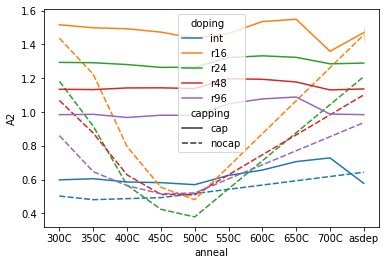

In [8]:
import seaborn as sns
def get_params(x):
    values = x.sample_name.split('_')
    keys = ['doping', 'capping', 'anneal']
    return pd.Series({**x, **dict(zip(keys, values))})
    
    
if __name__ == '__main__':
    sns.lineplot(x = 'anneal',
                y = 'A2',
                hue = 'doping',
                style = 'capping',
                data  = parameters.rename(columns = {' ': 'sample_name'}).apply(get_params, axis = 1),
               )


In [7]:
temp = optics.rename(columns = lambda x: tuple(x.split(', ')))
temp = temp.reindex(columns = pd.MultiIndex.from_tuples(temp.columns, names = ['nk', 'sample']))
temp = temp.stack('sample').reset_index()
temp[['doping','capping','anneal','comment']] = temp['sample'].str.split('_', expand = True)
temp.anneal = temp.anneal.astype(anneal)
temp.doping = temp.doping.astype(doping)
temp.capping = temp.capping.astype(capping)

temp = temp.set_index(['eV', 'doping', 'capping', 'anneal'])
temp = temp[temp.comment.astype(str) == 'nan']
optics_df = temp.sort_index()

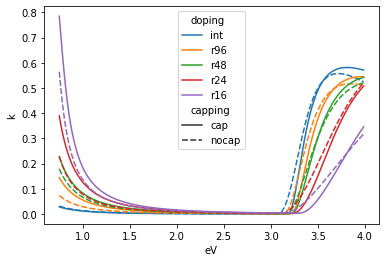

In [8]:
if __name__ == '__main__':
    sns.lineplot(x = 'eV', y = 'k',
             hue = 'doping',
             style = 'capping',
             data = temp.query('anneal == "300C"'))

TypeError: Cannot construct a 'CategoricalDtype' from 'int'